In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import yfinance as yf
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = yf.download("GOOGL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1351.390015,1387.469971,1325.199951,1386.319946,1386.319946,2771500
2020-03-03,1397.680054,1408.189941,1329.239990,1337.719971,1337.719971,2830100
2020-03-04,1358.959961,1382.780029,1337.000000,1381.599976,1381.599976,2379900
2020-03-05,1345.550049,1353.630005,1301.640015,1314.760010,1314.760010,2719000
2020-03-06,1269.949951,1302.750000,1257.209961,1295.739990,1295.739990,3232000


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,2053.600098,2080.330078,2048.000000,2054.260010,2054.260010,1473300
2021-02-23,2013.989990,2072.500000,1990.229980,2060.120117,2060.120117,1732900
2021-02-24,2030.040039,2088.320068,2027.530029,2083.810059,2083.810059,1130400
2021-02-25,2055.929932,2083.000000,2006.489990,2015.949951,2015.949951,2077400
2021-02-26,2029.949951,2056.520020,2001.010010,2021.910034,2021.910034,2001500


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,1549.957093,1571.335496,1530.778249,1551.948607,1551.948607,2.006782e+06
std,241.802051,242.769002,243.569235,242.735591,242.735591,9.143009e+05
min,1056.369995,1066.910034,1008.869995,1054.130005,1054.130005,4.656000e+05
25%,1409.604980,1429.929993,1394.494995,1413.080017,1413.080017,1.429150e+06
50%,1513.609985,1536.329956,1500.520020,1516.239990,1516.239990,1.710100e+06
75%,1741.109985,1763.744995,1726.414978,1740.280029,1740.280029,2.356800e+06
max,2107.790039,2145.139893,2093.330078,2118.620117,2118.620117,5.417900e+06


In [6]:
data.shape

(251, 6)

### Minimum price for Google

In [7]:
data[data["Adj Close"] == data["Adj Close"].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-23,1056.369995,1066.910034,1008.869995,1054.130005,1054.130005,4183600


### Maximum stock price for Google

In [8]:
data[data["Adj Close"] == data["Adj Close"].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-17,2093.97998,2122.439941,2088.350098,2118.620117,2118.620117,1014700


Text(0.5, 1.0, 'Google Stock Price')

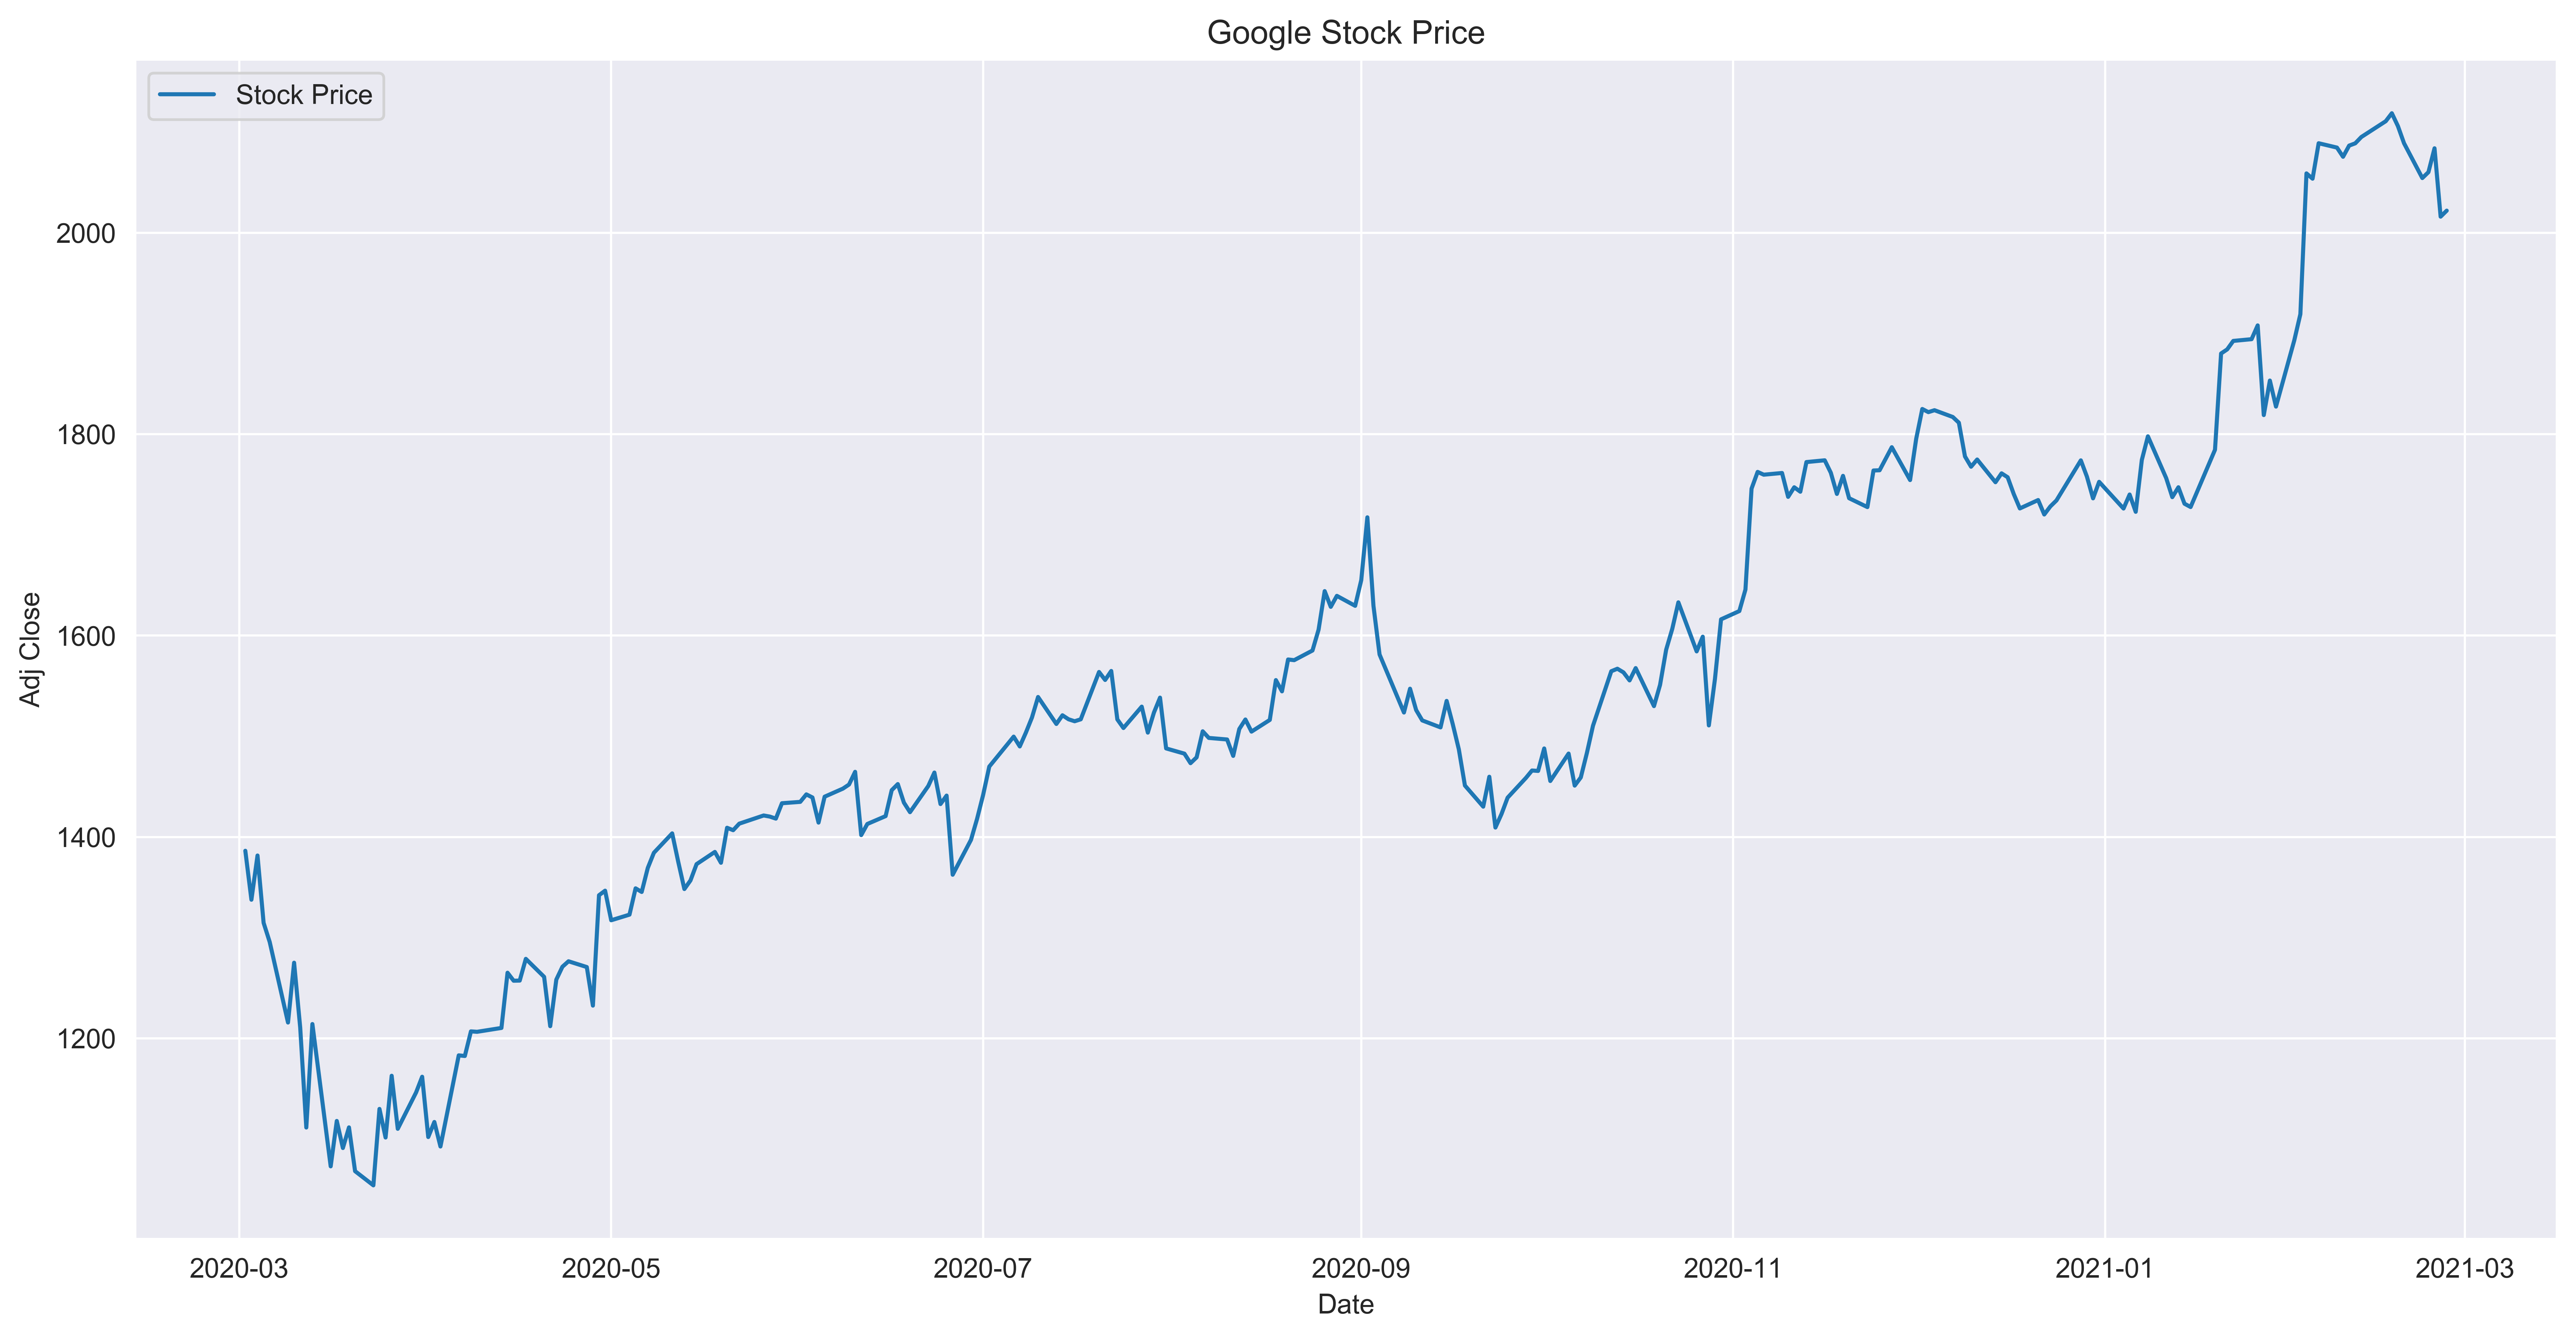

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=[16, 8], facecolor="w", dpi=550)
sns.set_style(style="darkgrid")
sns.lineplot(data.index, data["Adj Close"])
plt.legend(["Stock Price"])
plt.title("Google Stock Price")

### Return of stock price

In [10]:
ret = (data['Adj Close'] - data['Adj Close'].shift(1))/data['Adj Close'].shift(1)
ret

Date
2020-03-02         NaN
2020-03-03   -0.035057
2020-03-04    0.032802
2020-03-05   -0.048379
2020-03-06   -0.014467
                ...   
2021-02-22   -0.016541
2021-02-23    0.002853
2021-02-24    0.011499
2021-02-25   -0.032565
2021-02-26    0.002956
Name: Adj Close, Length: 251, dtype: float64

In [11]:
print(f"The average return for Google is {round(ret.mean(), 4)*100} %")

The average return for Google is 0.18 %


Text(0.5, 1.0, 'Daily return of Google stock price')

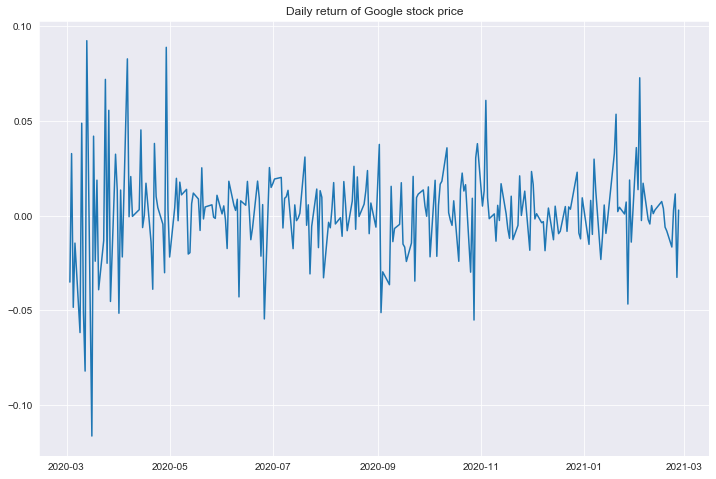

In [12]:
plt.figure(figsize=(12,8))
plt.plot(ret)
plt.title("Daily return of Google stock price")

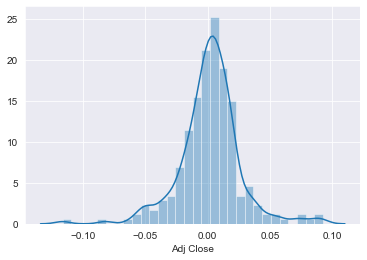

In [13]:
sns.distplot(ret.dropna())

## Annual Volatility

In [14]:
annual = np.std(ret) * np.sqrt(252)
print(f'The annualised volatility is {round(annual*100, 2)} %')

The annualised volatility is 39.15 %


In [15]:
### annualized volatility for 6 Months

six_months = data['Adj Close'][:126].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)
print(f"The six months annualized volatility is {round(six_months, 2) * 100} %")

The six months annualized volatility is 46.0 %


## Market Volatilty

In [16]:
VIX = yf.download("^VIX", start="2020-03-01", end="2021-03-01")
VIX.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,38.540001,40.410000,31.500000,33.419998,33.419998,0
2020-03-03,33.650002,41.060001,24.930000,36.820000,36.820000,0
2020-03-04,34.439999,35.580002,30.299999,31.990000,31.990000,0
2020-03-05,33.610001,42.840000,33.540001,39.619999,39.619999,0
2020-03-06,48.930000,54.389999,40.840000,41.939999,41.939999,0


In [17]:
print(f'The market volatility is {round(VIX["Adj Close"][-1], 2)} %.')

The market volatility is 27.95 %.


(array([ 1.,  1.,  1.,  8., 11., 37., 50.,  9.,  2.,  4.]),
 array([-0.12368463, -0.1024774 , -0.08127018, -0.06006296, -0.03885573,
        -0.01764851,  0.00355871,  0.02476594,  0.04597316,  0.06718038,
         0.08838761]),
 <a list of 10 Patch objects>)

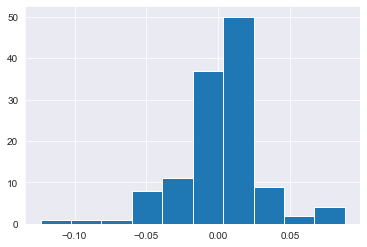

In [18]:
plt.hist(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)), bins=10,)

## Black-Schole Models

In [19]:
#S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    
def BlackScholesModel(S, K, T, r, vol, payoff='put'):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r*T) * (norm.cdf(d2))
    elif payoff == "put":
        option_value = np.exp(-r*T) * (1 - norm.cdf(d2))
    
    return round(option_value, 4)

In [20]:
def delta(S, K, t, r, vol):
    d2 = (np.log(S / K) + (r - .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    return np.round(-(np.exp(-r*t)* norm.pdf(d2))/(vol* S *np.sqrt(t)), 4)
        
def gamma(S, K, t, r, vol):
    d1 = (np.log(S / K) + (r + .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    d2 = (np.log(S / K) + (r - .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    gamma = (np.exp(-r*t) * d1 * norm.pdf(d2))/((vol**2) *(S**2)*(np.sqrt(t)))
    return np.round(gamma, 4)

def vega(S, K, t, r, vol):
    d1 = (np.log(S / K) + (r + .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    d2 = (np.log(S / K) + (r - .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    vega = (np.exp(-r*t)*norm.pdf(d2))*(d1/vol)
    return np.round(vega, 4)

def speed(S, K, t, r, vol):
    d1 = (np.log(S / K) + (r + .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    d2 = (np.log(S / K) + (r - .5 * vol ** 2) * t) / (vol * np.sqrt(t))

    a = np.exp(-r*t)*norm.pdf(d2)/((vol**2) * (S**3)*np.sqrt(t))
    p = -2*d1 + ((1 - d1*d2)/(vol*np.sqrt(t)))
    
    return a * p

def theta(S, K, t, r, vol):
    d1 = (np.log(S / K) + (r + .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    d2 = (np.log(S / K) + (r - .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    
    left = r*np.exp(-r*t)*(1 - norm.cdf(d2))
    right = np.exp(-r*t)*norm.pdf(d2)*((d1/(2*t))-((r)/(vol*np.sqrt(t))))
    return np.round(left - right, 4)

def rho(S, K, t, r, vol):
    d1 = (np.log(S / K) + (r + .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    d2 = (np.log(S / K) + (r - .5 * vol ** 2) * t) / (vol * np.sqrt(t))
    
    one = -t*np.exp(-r*t)*(1 - norm.cdf(d2))
    two = (np.sqrt(t)/vol)*np.exp(-r*t)*norm.pdf(d2)
    return np.round(one-two, 4)

## Monte-Carlo Simulation

In [21]:
def mcs_put(Spot, K, t, r, vol, num_round=1000,random_state=None):
   ##############  num_round is the number of iterations  ##################
    M = int(t*360)
    I = num_round
    dt = t / M 
    S = np.zeros((M + 1, I))
    S[0] = Spot
    if random_state:
        np.random.seed(109)
        rn = np.random.standard_normal(S.shape)
    else: 
         rn = np.random.standard_normal(S.shape)
    for i in range(1, M + 1): 
        S[i] = S[i-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[i])
        
    S = np.transpose(S)
    put = np.mean(np.heaviside(K - S[:,-1],0))

    return round(put, 4)

## Option price models

In [22]:
#Selecting strike price
data.loc["2021-01-29"]["Adj Close"]

1827.3599853515625

In [23]:
stock_price = data.loc["2021-01-29"]["Adj Close"]

strike_price = 1800
risk_free_rate = .06
time = 60.0/360  #### 120 days
sig = annual 

### Black Schole Model

In [24]:
black = BlackScholesModel(S=stock_price, K=strike_price, T=time, r=risk_free_rate, vol=sig, payoff="put")
black

0.4646

#### Delta

In [25]:
delta(S=stock_price, K=strike_price, t=time, r=risk_free_rate, vol=sig)

-0.0013

In [26]:
D = np.linspace(50,150,11)
delta_ = np.zeros((len(D), 1))
for i in range(len(D)):
    delta_ [i] =  delta(S=D[i], K=100, t=1, r=0.05, vol=0.25)
    

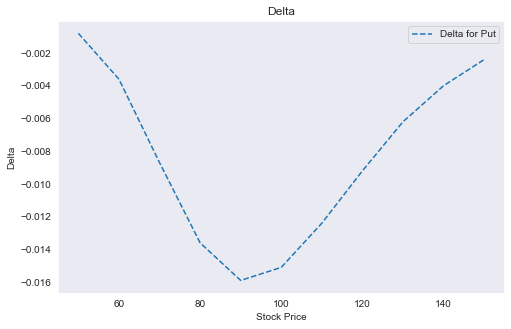

In [27]:
fig = plt.figure(figsize=(8, 5))
plt.plot(D, delta_, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

#### Vega

In [28]:
vega(S=stock_price, K=strike_price, t=time, r=risk_free_rate, vol=sig)

0.2383

In [29]:
v = np.linspace(0.1,0.4,13)
veg = np.zeros((len(v),1))
for i in range(len(v)):
    veg [i] = vega(S=100, K=100, t=1, r=.05, vol=v[i])

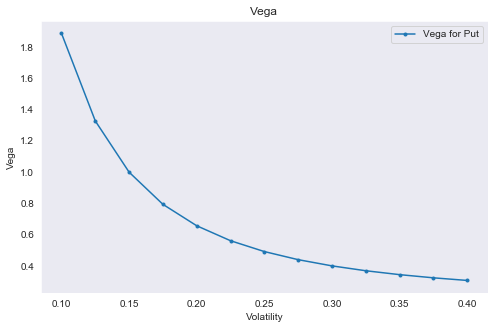

In [30]:
fig = plt.figure(figsize=(8, 5))
plt.plot(v, veg, '.-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

#### Speed

In [31]:
speed(S=stock_price, K=strike_price, t=time, r=risk_free_rate, vol=sig)

5.848496205209045e-09

In [32]:
sp = np.linspace(50,150,11)
spee = np.zeros((len(sp),1))
for i in range(len(sp)):
    spee[i] = speed(S=sp[i], K=100, t=1, r=.03, vol=.25)
    

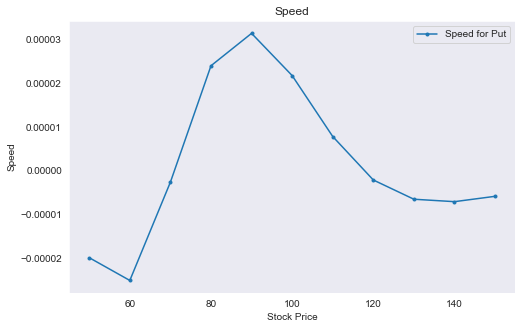

In [33]:
fig = plt.figure(figsize=(8, 5))
plt.plot(sp, spee, '.-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

#### Gamma

In [34]:
gamma(S=stock_price, K=strike_price, t=time, r=risk_free_rate, vol=sig)

0.0

In [35]:
G = np.linspace(70,150,11)
gama = np.zeros((len(G), 1))
for i in range(len(G)):
    gama[i] = gamma(S=G[i], K=100, t=1, r=.05, vol=.25)    

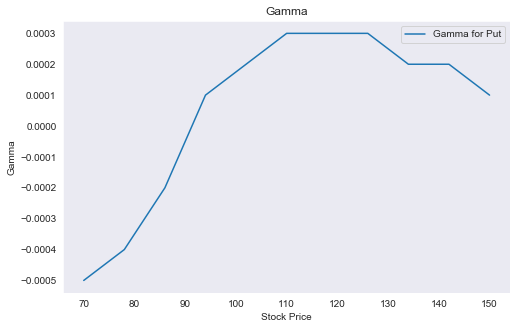

In [36]:
fig = plt.figure(figsize=(8, 5))
plt.plot(G, gama, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

#### Theta

In [37]:
theta(S=stock_price, K=strike_price, t=time, r=risk_free_rate, vol=sig)

-0.1041

In [38]:
Th = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(Th),1))
for i in range(len(Th)):
    Theta_Put[i] = theta(S=100, K=100, t=Th[i], r=.05, vol=.25)

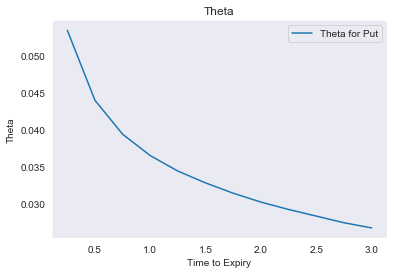

In [39]:
fig = plt.figure()
plt.plot(Th, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

## Monte-Carlo Simulation
The put option price for Mote-Carlo simulation is given below

In [40]:
mc = mcs_put(Spot=stock_price, K=strike_price, t=time, r=risk_free_rate, vol=sig, random_state=42)
mc

0.466

In [41]:
#number of spot prices
Stock_prices = np.linspace(55,150, 100)
strike_price = 100
time_to_expiry = 1
volatility = 0.35
rate = 0.05

In [42]:
_black = np.zeros((100,))
_MC = np.zeros((100,))

for i, S in enumerate(Stock_prices):
    _black[i] = BlackScholesModel(S=S, K=strike_price, T=1, r=rate, vol=.05, payoff="put")
    _MC[i] = mcs_put(Spot=S, K=strike_price, t=1, r=rate, vol=.05, random_state=12)   

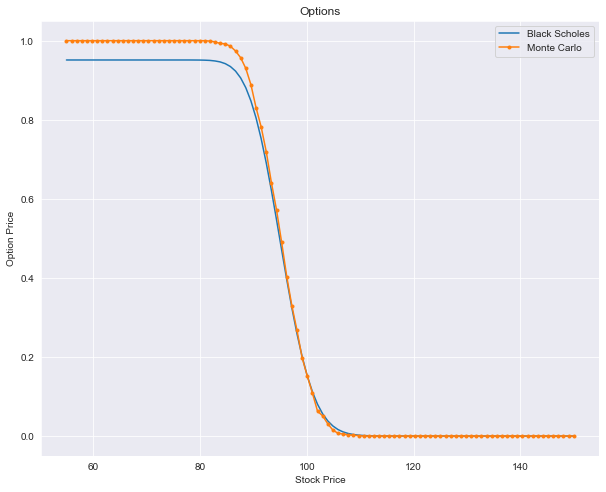

In [43]:
fig = plt.figure(figsize=[10, 8])

#plot the option prices from each model against stock prices
plt.grid(b=True)
plt.plot(Stock_prices, _black, '-')
plt.plot(Stock_prices, _MC, '.-')


plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Options')
plt.legend(['Black Scholes', "Monte Carlo"])